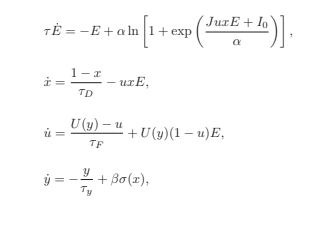

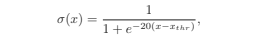

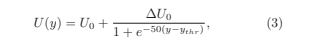

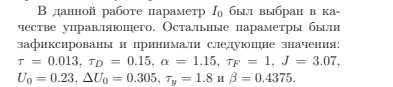

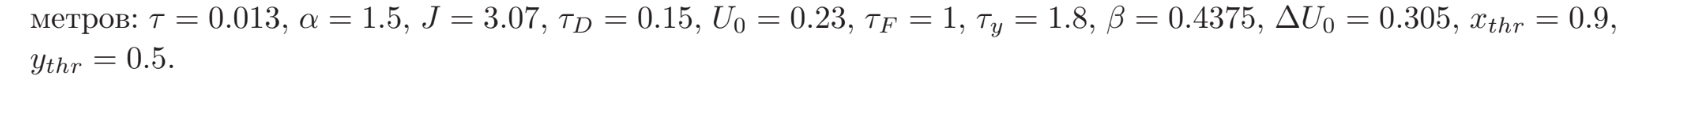

In [1]:
using DynamicalSystems, DifferentialEquations, OrdinaryDiffEq, StaticArrays

In [2]:
using CairoMakie

In [3]:
τ = 0.013
α = 1.5
J = 3.07
τ_D = 0.15
U0 = 0.23
τ_F = 1
ΔU0 = 0.305
τ_y = 1.8
β = 0.4375
xthr = 0.9
ythr = 0.5
I0 = -1.45

-1.45

In [4]:
U(y) = U0 + ΔU0 / ( 1 + exp( -50 * ( y - ythr ) ) )
σ(x)= 1 / (1 + exp(-20 * (x - xthr)))

σ (generic function with 1 method)

In [5]:
function model(u, p ,t)
    
    E, x, u_, y = u
    τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0 = p
    
    du1 = (-E + α * log( 1 + exp( ( J * u_ * x * E + I0 ) / α ) )) / τ
    du2 = ( 1 - x ) / τ_D - u_ * x * E
    du3 = (U(y) - u_) / τ_F + U(y) * ( 1 - u_ ) * E
    du4 = -y /  τ_y + β * σ(x)
    
    return SVector(du1, du2, du3, du4)
    
end

model (generic function with 1 method)

In [6]:
p = SA[τ, α, τ_D, J, U0, ΔU0, τ_y, β, xthr, ythr, I0]
u0 = SA[1.4, 0.6, 0.0, -2.3];
tspan = (0.0, 2000.0)

(0.0, 2000.0)

In [7]:
prob = ODEProblem(model, u0, tspan, p)
sol = solve(prob, RK4(),  adaptive = false, dt = 0.001);

In [8]:
sol

retcode: Success
Interpolation: 3rd order Hermite
t: 2000002-element Vector{Float64}:
    0.0
    0.001
    0.002
    0.003
    0.004
    0.005
    0.006
    0.007
    0.008
    0.009000000000000001
    0.010000000000000002
    0.011000000000000003
    0.012000000000000004
    ⋮
 1999.9899999596184
 1999.9909999596184
 1999.9919999596184
 1999.9929999596184
 1999.9939999596183
 1999.9949999596183
 1999.9959999596183
 1999.9969999596183
 1999.9979999596183
 1999.9989999596182
 1999.9999999596182
 2000.0
u: 2000002-element Vector{SVector{4, Float64}}:
 [1.4, 0.6, 0.0, -2.3]
 [1.3321577916975063, 0.6026575753102543, 0.0005437391813267274, -2.2987214664043036]
 [1.269364294500255, 0.6052970825996566, 0.0010717707674705085, -2.297443582651458]
 [1.2112428213589406, 0.6079186880651763, 0.0015852461127284021, -2.2961663455634658]
 [1.1574449467363022, 0.6105225508116569, 0.0020852295934048666, -2.2948897518558753]
 [1.1076483688772056, 0.6131088236377532, 0.0025727052674429447, -2.29361379813

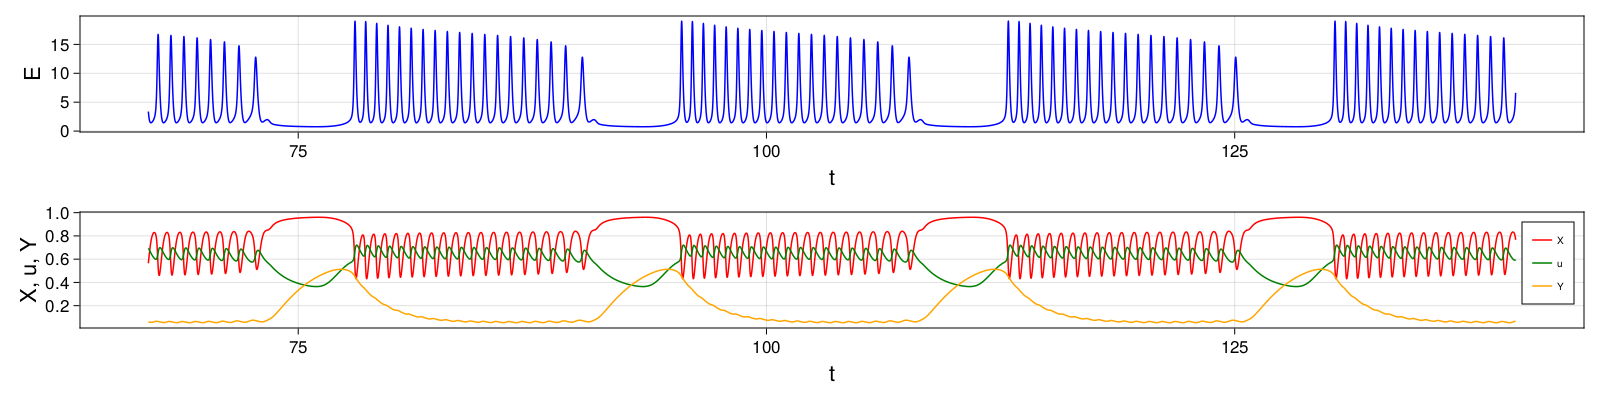

In [9]:
f = Figure(resolution = (1600, 400))

ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

ts, tf = 67000, 140000

lines!(ax1, sol.t[ts:tf], sol[1,ts:tf], color = "blue", label = "E")

lines!(ax2, sol.t[ts:tf], sol[2,ts:tf], color = "red", label = "X")
lines!(ax2, sol.t[ts:tf], sol[3,ts:tf], color = "green", label = "u")
lines!(ax2, sol.t[ts:tf], sol[4,ts:tf], color = "orange", label = "Y")

axislegend(ax2, labelsize=10)
f

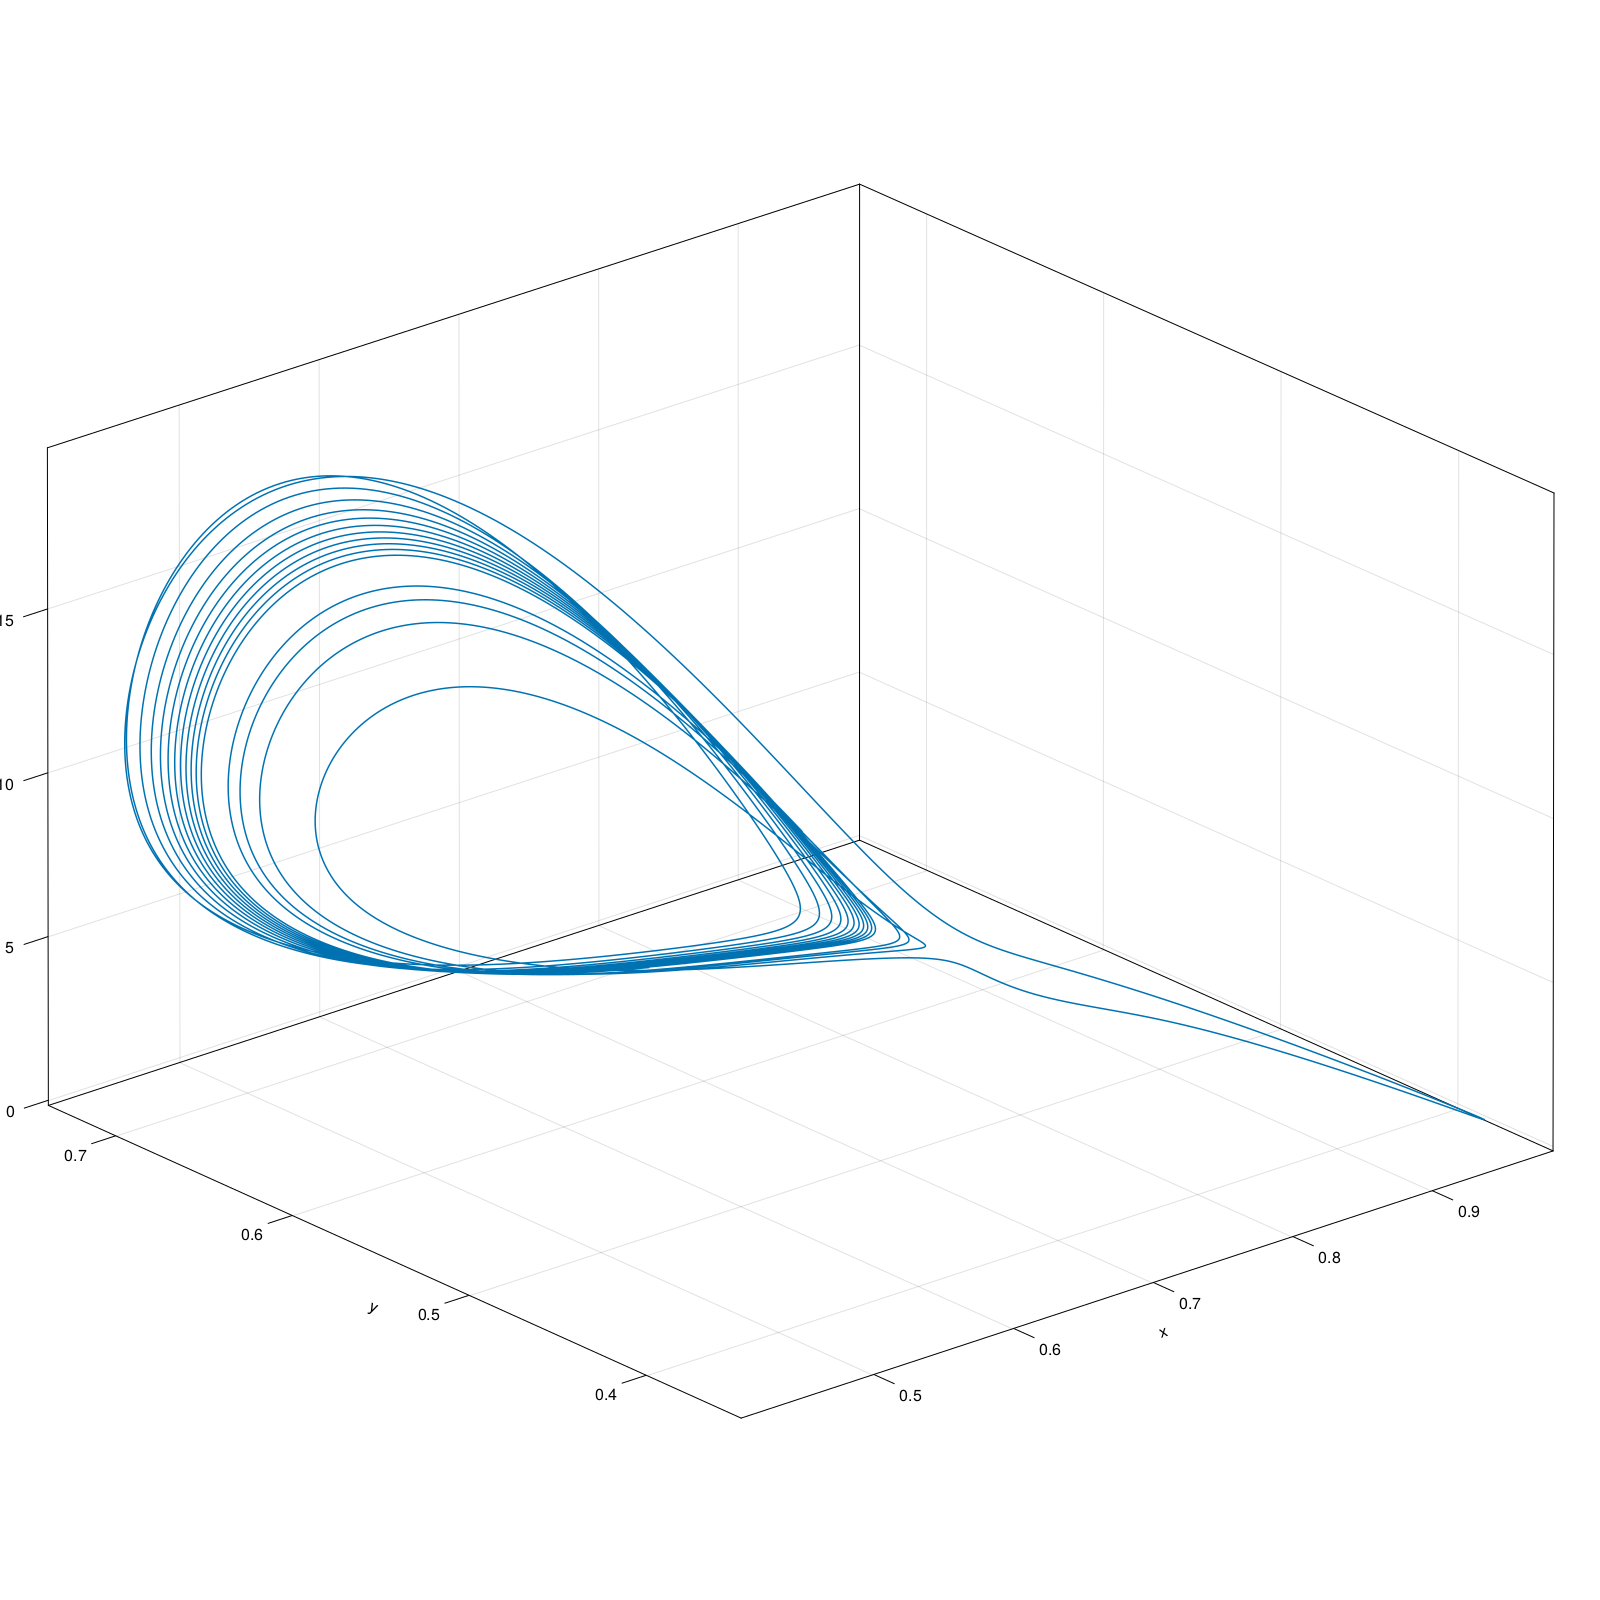

In [53]:
f = Figure(resolution = (1600, 1600))
ts, tf = 140000, 155000
ax = Axis3(f[1, 1])
lines!(sol[2,ts:tf], sol[3,ts:tf], sol[1,ts:tf])
f

In [11]:
ds = ContinuousDynamicalSystem(model, u0, p)

4-dimensional continuous dynamical system
 state:       [1.4, 0.6, 0.0, -2.3]
 rule f:      model
 in-place?    false
 jacobian:    ForwardDiff
 parameters:  [0.013, 1.5, 0.15, 3.07, 0.23, …, 1.8, 0.4375, 0.9, 0.5, -1.45]

In [44]:
tr = trajectory(ds, 2000.0; Δt = 0.001, diffeq = (alg = RK4(),  adaptive = false, dt = 0.001))

4-dimensional Dataset{Float64} with 2000001 points
 1.4       0.6       0.0          -2.3
 1.33216   0.602658  0.000543739  -2.29872
 1.26936   0.605297  0.00107177   -2.29744
 1.21124   0.607919  0.00158525   -2.29617
 1.15744   0.610523  0.00208523   -2.29489
 1.10765   0.613109  0.00257271   -2.29361
 1.06155   0.615678  0.00304858   -2.29234
 1.01889   0.618229  0.0035137    -2.29106
 0.979395  0.620764  0.00396885   -2.28979
 0.942837  0.623281  0.00441473   -2.28852
 0.908997  0.625781  0.00485202   -2.28724
 0.877672  0.628265  0.00528133   -2.28597
 0.848675  0.630732  0.00570324   -2.2847
 ⋮                                
 2.09187   0.822411  0.6192        0.103892
 2.10105   0.822527  0.618995      0.103911
 2.11035   0.822638  0.618791      0.10393
 2.11976   0.822743  0.618587      0.103949
 2.12928   0.822843  0.618385      0.103968
 2.13892   0.822938  0.618184      0.103988
 2.14868   0.823028  0.617985      0.104007
 2.15856   0.823112  0.617786      0.104027
 2.16856 

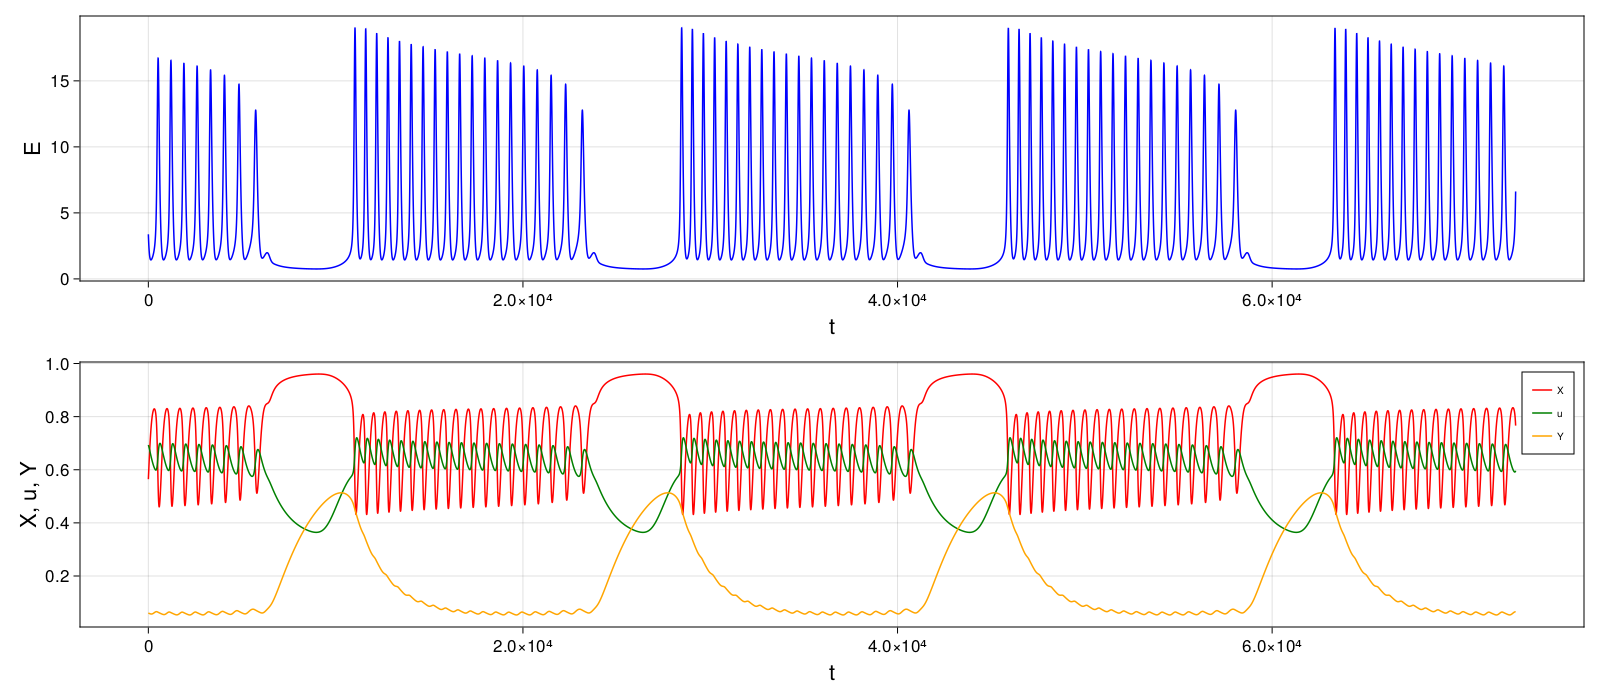

In [45]:
f = Figure(resolution = (1600, 700))

ax1 = Axis(f[1, 1], xlabel = "t", ylabel = "E", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)
ax2 = Axis(f[2, 1], xlabel = "t", ylabel = "X, u, Y", xlabelsize = 22, ylabelsize = 22,xticklabelsize = 17, yticklabelsize = 17)

ts, tf = 67000, 140000

lines!(ax1, tr[ts:tf, 1], color = "blue", label = "E")

lines!(ax2, tr[ts:tf, 2], color = "red", label = "X")
lines!(ax2, tr[ts:tf, 3], color = "green", label = "u")
lines!(ax2, tr[ts:tf, 4], color = "orange", label = "Y")

axislegend(ax2, labelsize=10)
f

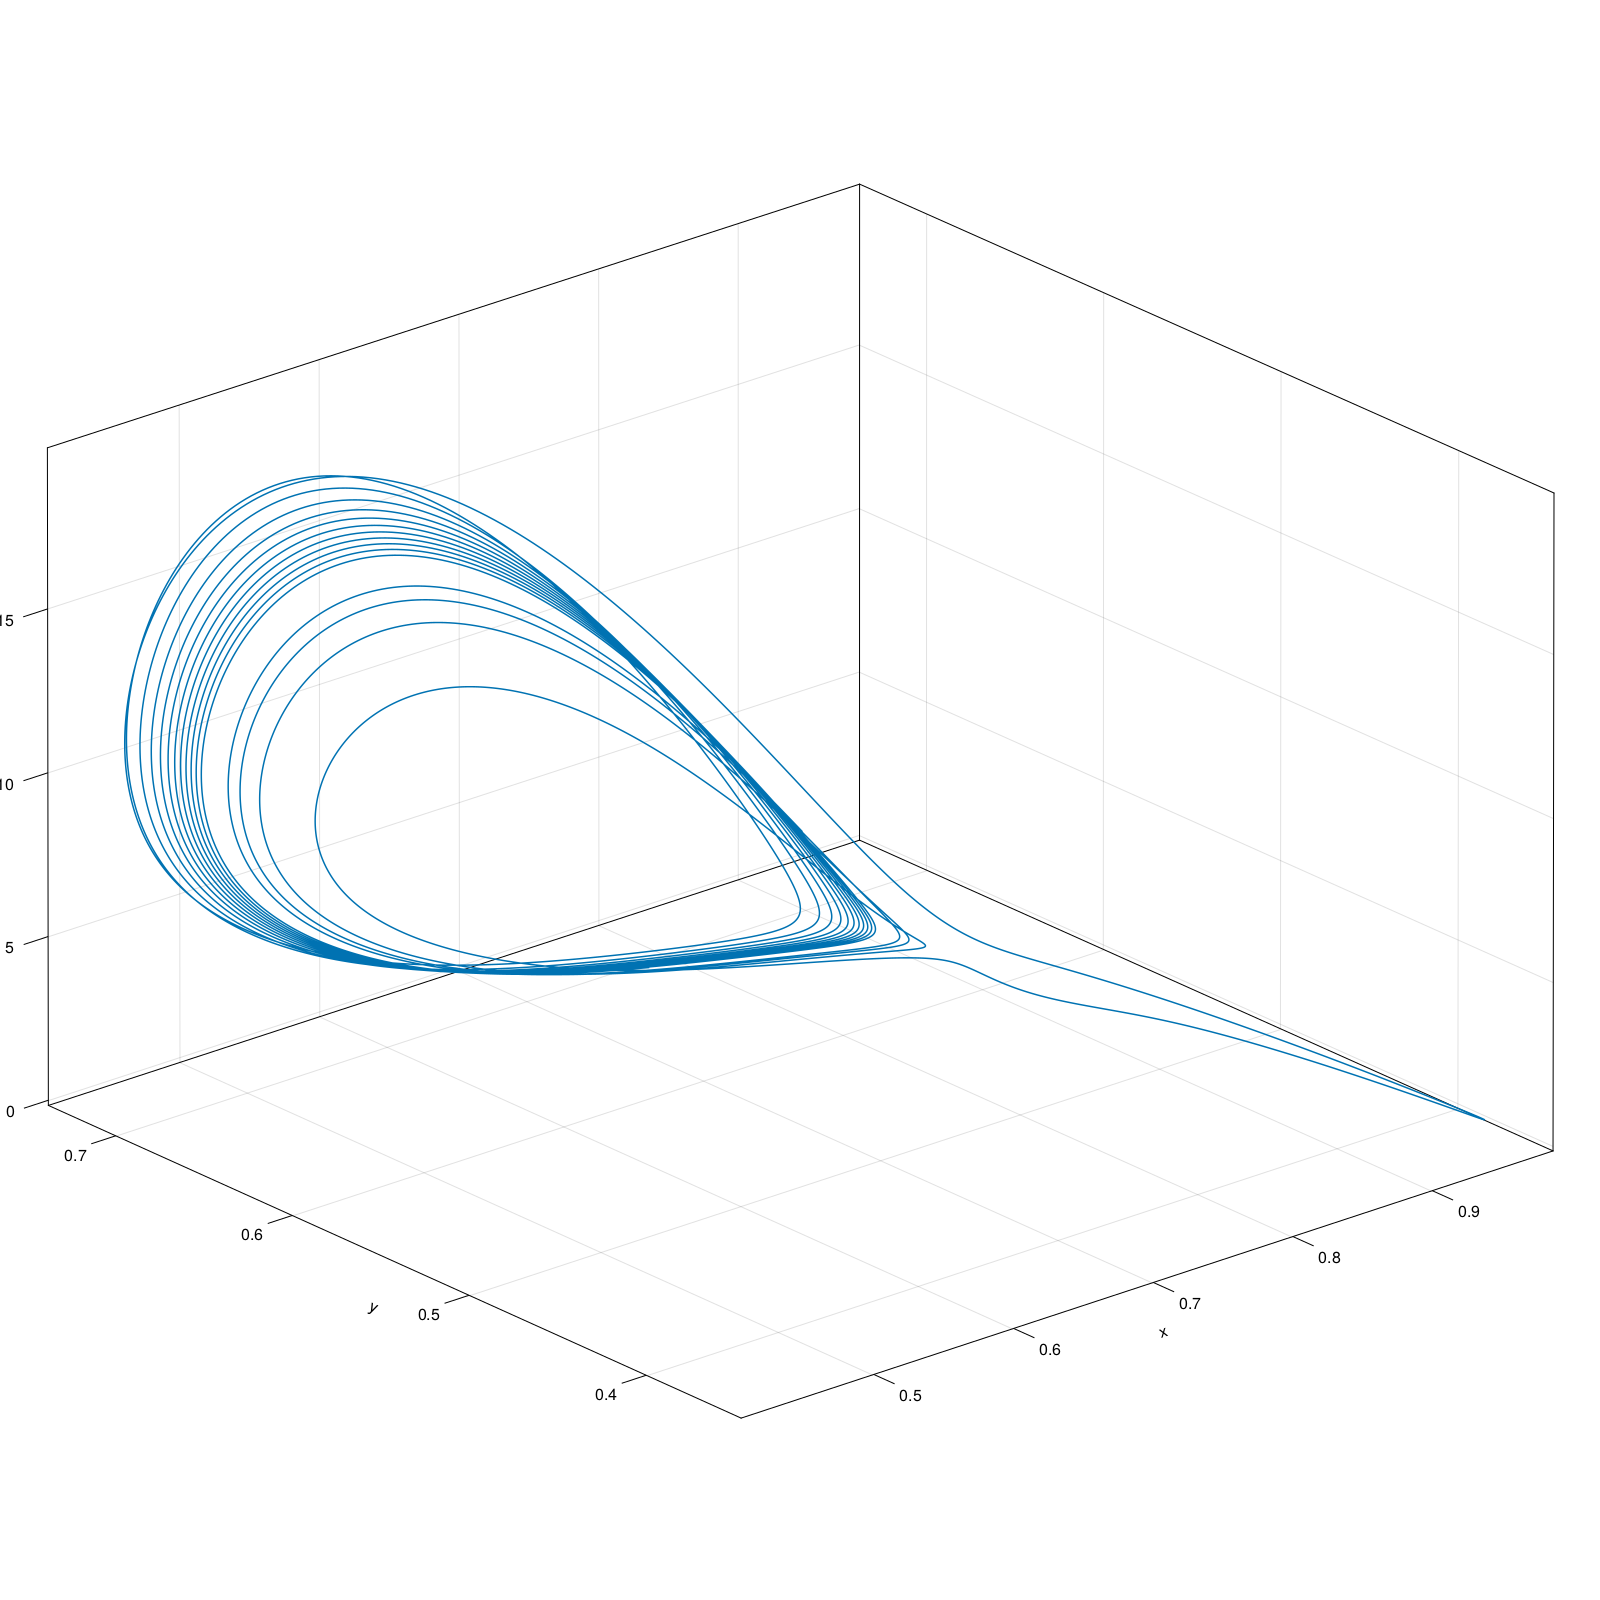

In [52]:
f = Figure(resolution = (1600, 1600))
ts, tf = 140000, 155000
ax = Axis3(f[1, 1])
lines!(tr[ts:tf, 2], tr[ts:tf, 3], tr[ts:tf, 1])
f